Understanding Learning Through Linear Regression
==========

Ok, earlier we had a very brief introduction to what is [linear regression](http://en.wikipedia.org/wiki/Linear_regression).  For the next two activities, they are to be done on your own over the next few days.  No practise exercises, just go through them at your own pace and understand what it is about.

The following exercises illustrate different aspects of learning theory by using linear regression in a 2-dimensional space as a working learning model. We won't look at the theory of linear regression; we will just use it as a black box in order to understand some fundamental concepts of the theory of learning. Also, we won't look at the varied mathematical detail of the concepts we are introducing. So this is a tutorial without mathematics nor analysis.

Now it's important to realise that in data science you will rarely use this kind of simple 2-dimensional modelling. The problem is stylised, and you rarely get simple Gaussian noise like this. In many ways this is a trivial, unrealistic example of learning and statistics. However, the simple nature of the material means we can carefully study the different aspects of learning, and discuss some of the behaviour that theory tells us about. So this is excellent material for a tutorial.


Linear regression
----------
The name *linear regression* is a bit confusing because the model allows non-linear curves to be fit to data.  The *linear* part is in the structure of the model.  We are only considering the 1-dimensional case for simplicity, so we estimate $y$ in terms of $x$.  So a simple so-called quadratic would make an estimate for $y$ using the form: 

  $$a*1 + b*x + c*x^2$$
  
where we have a vector of 3 parameters, $(a,b,c)$, to *learn* and the function for $y$ is being represented as
some linear combination of the *basis functions* $(1,x,x^2)$.  The vector of parameters is called the *coefficients* for the linear regression.

Below we plot four different versions of this function for different values of the coefficients (that is, $(a,b,c)$).

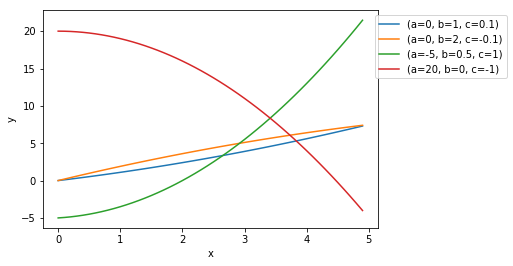

In [2]:
import numpy
import matplotlib.pyplot as pl
%matplotlib inline

# generate a list of points between (0,5)
x = numpy.arange(0., 5., 0.1)

def makelabel(a,b,c):
    return '(a=' + str(a) + ', b=' + str(b) + ', c=' + str(c) + ')'

# now plot some curves with different co-efficients
[a,b,c]  = [0,1,0.1]
pl.plot(x, a + b*x + c*x**2, label=makelabel(a,b,c))
[a,b,c]  = [0,2,-0.1]
pl.plot(x, a + b*x + c*x**2, label=makelabel(a,b,c))
[a,b,c]  = [-5,0.5,1]
pl.plot(x, a + b*x + c*x**2, label=makelabel(a,b,c))
[a,b,c]  = [20,0,-1]
pl.plot(x, a + b*x + c*x**2, label=makelabel(a,b,c))

# move the legend out of the way
# the (1.2, 1.2) starts the legend at the location relative to
# the top right corner
pl.legend(bbox_to_anchor=(1.4, 1.0))
pl.ylabel('y')
pl.xlabel('x')
pl.show()

A general purpose 3-term linear model would make an estimate for $y$ using the form: 

  $$a*f(x) + b*g(x) + c*h(x)$$
  
where we have a vector 3 parameters, $(a,b,c)$, to *learn* and the function for $y$ is being represented as
some linear combination of the *basis functions* $(f(x),g(x),h(x))$.  In the example above this uses
the mapping

$$ f(x) \mapsto 1 ~,~~~~ g(x) \mapsto x ~,~~~~ h(x) \mapsto x^2 $$

Now we will use two different black box regression tools for this exercise. The first does linear regression 
to the *$N$-th order* using powers of $x$, so the $N+1$ basis functions are $(1,x,x^2,...,x^{N+1})$.  We call this *Regression with Simple Powers*.  The second does a special version of smoothing or regularisation using [Legendre Polynomials](http://en.wikipedia.org/wiki/Legendre_polynomials) that we call *Regression with Smoothed Legendre Polynomials*.  For the purposes of this activity, treat these as black boxes, as you do not need to understand how these two black boxes work (for this Unit).

# Building a Dataset
We will now explore how well linear regression works with different amounts of data, and with different polynomial orders. In this demonstration we define a "true" function which is used to generate data sets.   Some times we want many different data sets of size 30, and sometimes we want a single data set and we take its initial sets, first 10, first 20, first 40, etc.  But the "true" function is used to generate the data and in plots so we can compare fits and the data with the truth.

## Configuration
The dataset and display has a number of characteristics.
You can change the sample size, the range for $x$, the display (plotted) range for y,
noise configuration, and the function being estimated by altering these values.

We restrict the $x$ values to a given range and sample a number of points,
uniformly or at random:
+ *rd.xmin* : minimum for $x$ from the "regressiondemo.py" library, fixed at 0
+ *rd.xmax* : maximum for $x$, from the "regressiondemo.py" library, fixed at 10
+ *points* : number of data points in the sample, defined locally in this notebook

The $y$ will take on any value depending on noise level and the true function:
+ *truefunc()* : the "true" function underlying the data, defined locally in this notebook
+ *sigma* : scale of noise to add,

When plotting, we restrict $y$ values to a fixed range for convenience:
+ *ydisplaymin* : when plotting, the minimum $y$ shown, defined locally in this notebook
+ *ydisplaymax* : when plotting, the maximum $y$ shown, defined locally in this notebook

## Step 1.1:   Generate noise-free data
First we generate a data set with no noise, so the points lie perfectly on the "true" curve. Note the range for the x-axis and the function are defined in this section and used in the subsequent steps. Once you have worked through the full demomstration, all the steps, you may wish to go back and play with these.

Note: The code below uses some functions from the file regressiondemo, which was developed by Professor Wray Buntine for this illustration purposes.

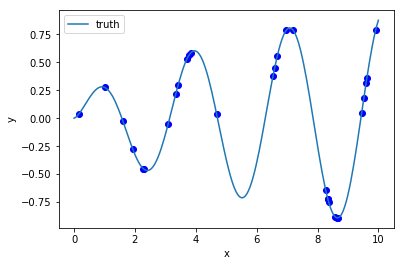

In [6]:
# libraries
%matplotlib inline
import matplotlib.pyplot as pl
import sys
import os
#  do this so it finds our own library
sys.path.append(os.getcwd())
#   this is all of our functions
import regressiondemo as rd

##############################
#      Customize the demo here
#      =======================
# the "true" function of x with range fixed at [0,10]
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

#  when fitting goes wild, need to constrain what y's are plotted
#  must be compatible with "true" function
ydisplaymin = -1.8
ydisplaymax = 1.8

#  don't make points more than 100 as demo is O(points^3)
points = 30

#  set noise level (std.dev)
rd.setSigma(0.2)
##############################

#  generate a x vector randomly
x = rd.makeX(points)
#  build the true values matching the sampled data
yt = truefunc(x)

# xts and yts store the "true" function for the purposes of plotting
# these have to be high frequency to make the resultant plot look
# like a smooth curve
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

# now plot
pl.plot(x, yt, 'bo')
pl.plot(xts, yts,label = 'truth') 
pl.ylabel('y')
pl.xlabel('x')
pl.legend()
pl.show()

## Step 1.2:  Adding noise
The most common approach is to add the noise to $y$.
Here we will add Gaussian noise with a standard deviation of *sigma*.

We will plot the data, the "true" function, and the pure noise (data minus the "truth") below.

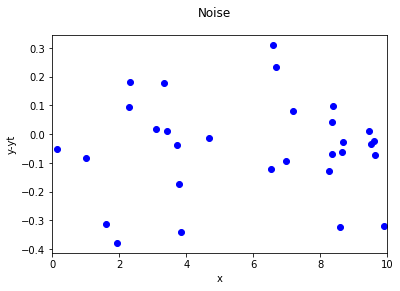

Text(0.5, 0.98, 'Data and Function')

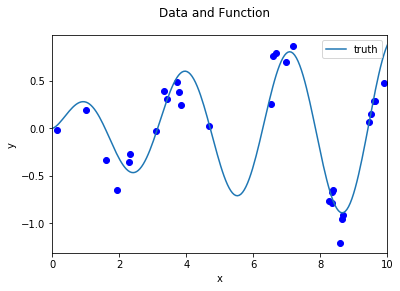

In [7]:
#  adds Gaussian noise
y = rd.addNoise(yt)

#  plot noise
pl.plot(x, y-yt, 'bo') # points instead of lines
pl.ylabel('y-yt')
pl.xlabel('x')
pl.suptitle('Noise')
pl.xlim(rd.xmin,rd.xmax)
pl.show()

# plot data and the curve
pl.plot(x, y, 'bo') # for data, plot points instead of lines
pl.ylabel('y')
pl.xlabel('x')
pl.xlim(rd.xmin,rd.xmax)
pl.plot(xts, yts,label = 'truth') # default is green line? 
pl.legend()
pl.suptitle('Data and Function')

# Performing Linear Regression
We will use the standard linear regression function available in Python, *numpy.polyfit()*.  This fits a function $f(x)$ to a sequence of data points

$$(x_1,y_1,),...,(x_N,y_N)$$

in order to minimise the squared error between the data and proposed function, given by

$$\sum_{i=1}^N (y_i-f(x_i))^2 $$

The underlying algorithm is not important for us currently.  But you have to see how to call the functions in *Python*.  

## Step 1.3:  Running linear regression and plotting
To show how its done, we fit a simple 4-th order polynomial.  Most of the code is for the plotting.  Note the "true" function is plotted with a thick line, and the simple polynomial fit is overlayed.

Text(0.5, 0.98, 'A simple polynomial fit')

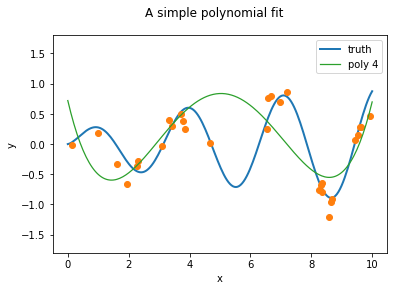

In [8]:
# plot data and the truth
pl.plot(xts, yts,label = 'truth', linewidth=2) 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

##############################
#      Customize the demo here
#      =======================
#     change the order to see different order polynomials being fit
order = 4
##############################

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
    
#  the y range for the plot has to be altered depending on the data
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()
pl.suptitle('A simple polynomial fit')

Low order linear regression doesn't work too well for complex functions.

## Step 1.4:  Testing on a mystery function
First we generate the data.  We fix it here, so later on when we try different fits, the dataset doesn't change.  The function *rd.demoReg1()* has its own embedded "truth" to generate the data. (Note: Remember that the *rd* is the *regressiondemo* library provided for this Unit's purposes).

Text(0.5, 0, 'x')

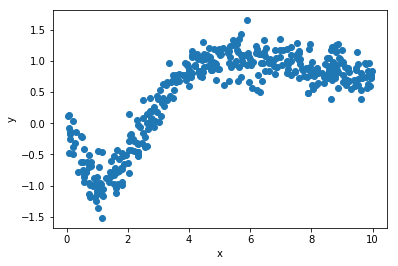

In [9]:
# so e.g. student exercise, try 3rd, 5th, 6th
# try own data, e.g. height & age from 0 to 15, linear? from 50 to 80, also linear? from 0 to 100, slight curve...?
# try S-curve e.g. World population
# https://en.wikipedia.org/wiki/World_population
# Crickets, patients data

##############################
#      Customize the demo here
#      =======================
#     # of data
points = 400
##############################

x,y = rd.demoReg1(points)
# plot data 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

Now with the dataset fixed, we can try different fits.

Text(0.5, 0.98, 'A simple polynomial fit to mystery data')

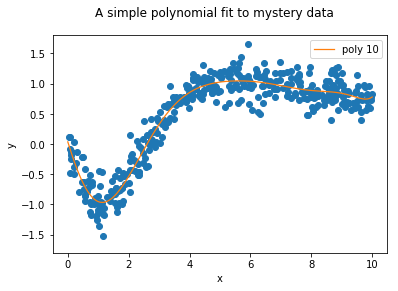

In [10]:
##############################
#      Customize the demo here
#      =======================
#     change the order to see different order polynomials being fit
order = 10
##############################

# plot data 
pl.plot(x, y, 'o') 
pl.ylabel('y')
pl.xlabel('x')

#  build the fitted poly curve (xts,ys) from order-th regression
ys = rd.linReg(x,y,xts,order)

#  plot fitted curve
pl.plot(xts, ys,label = 'poly ' + str(order), linewidth=1.25 )  
    
#  the y range for the plot has to be altered depending on the data
pl.ylim(ydisplaymin,ydisplaymax)
pl.legend()
pl.suptitle('A simple polynomial fit to mystery data')

So, for different dataset sizes (change *points*), try different polynomial *orders* to see what looks good.